# The challenge
we want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **1 Data Gathering**

In [51]:
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **2. Data Understanding** 

In [53]:
train_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [55]:
print('Data Describe')
print(train_data.describe())

Data Describe
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


**Missing Values**

In [56]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **3. EDA** : Exploratory Data Analysis (EDA)

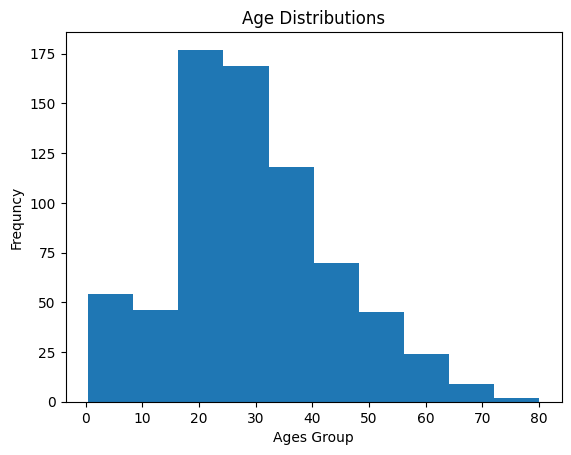

In [57]:
#Age Distibution
plt.hist(train_data.Age,bins=10)
plt.xlabel('Ages Group')
plt.ylabel('Frequncy')
plt.title('Age Distributions')
plt.show()

**Distributions**

Totla Females :  314
Females Who Are Survived : 233
Total Males :  577
males Who Are Survived : 109


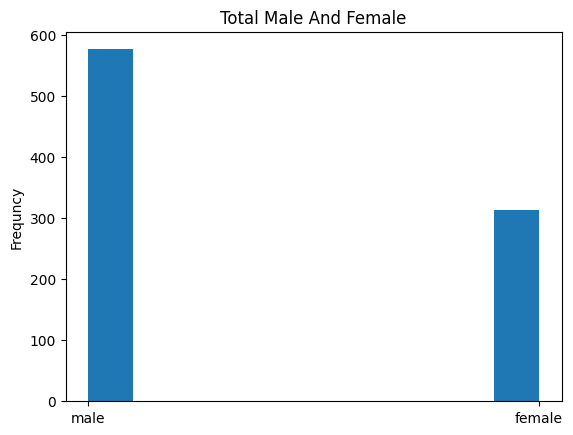

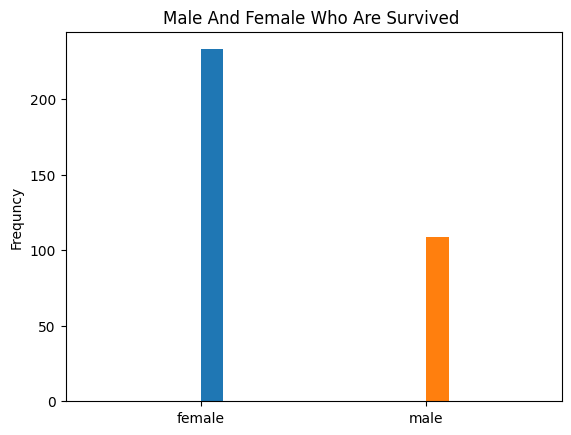

In [58]:
#Female And Male survival Graphs

females = train_data.loc[train_data['Sex']=='female']['Survived'] #Total womens

males = train_data.loc[train_data['Sex']=='male']['Survived'] #Total mens

print('Totla Females : ',len(females))
print('Females Who Are Survived :' , sum(females))

print('Total Males : ' ,len(males))
print('males Who Are Survived :'  , sum(males))

plt.hist(train_data.Sex)
plt.title('Total Male And Female')
plt.ylabel('Frequncy')
plt.show()

plt.hist(train_data.Sex[train_data.Sex=='female'][train_data.Survived==1])
plt.hist(train_data.Sex[train_data.Sex=='male'][train_data.Survived==1])
plt.ylabel('Frequncy')
plt.title('Male And Female Who Are Survived ')
plt.show()

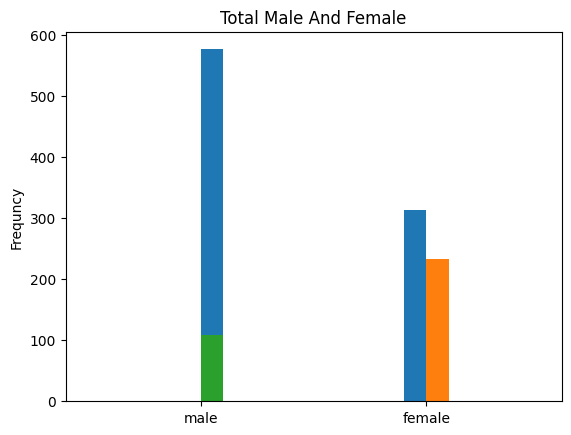

In [59]:
plt.hist(train_data.Sex)
plt.title('Total Male And Female')
plt.ylabel('Frequncy')


plt.hist(train_data.Sex[train_data.Sex=='female'][train_data.Survived==1])
plt.hist(train_data.Sex[train_data.Sex=='male'][train_data.Survived==1])
plt.show()

**outliers**

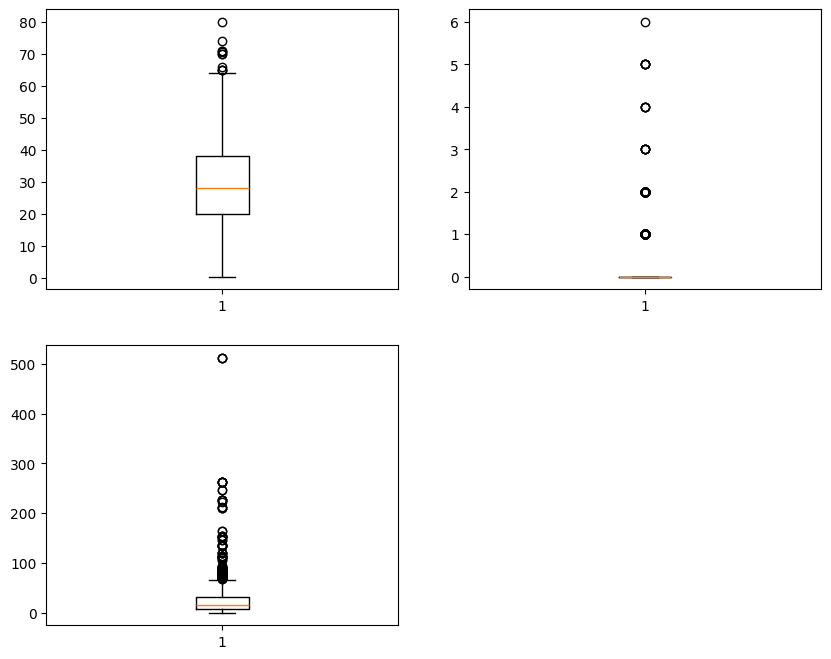

In [60]:
plt.figure(figsize=(10,8))

#outlier in Age Attribute
ages = train_data.Age.dropna()

plt.subplot(2,2,1)
plt.boxplot(ages)

plt.subplot(2,2,2)
plt.boxplot(train_data.Parch)

plt.subplot(2,2,3)
plt.boxplot(train_data.Fare)
plt.show()

**Heat Map : Relation**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None


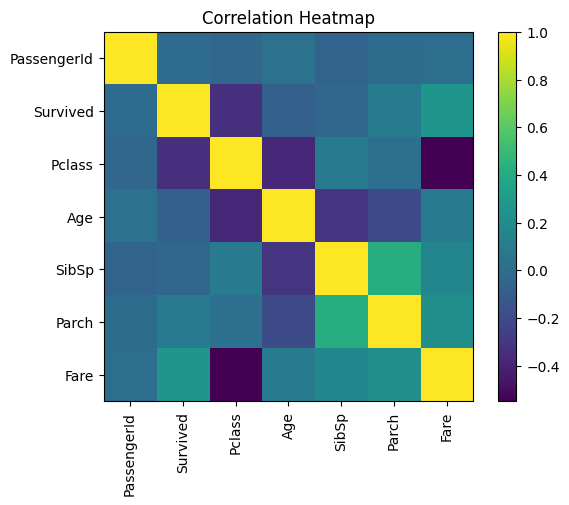

In [61]:
data = train_data.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)
print(data.info())

corr = data.corr()
plt.imshow(corr,cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.show()

# **4. Data Cleaning**

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
X_data = train_data.drop(['PassengerId','Survived','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
print(X_data)

Y_data = train_data.Survived
print(Y_data)

     Pclass     Sex   Age  SibSp  Parch
0         3    male  22.0      1      0
1         1  female  38.0      1      0
2         3  female  26.0      0      0
3         1  female  35.0      1      0
4         3    male  35.0      0      0
..      ...     ...   ...    ...    ...
886       2    male  27.0      0      0
887       1  female  19.0      0      0
888       3  female   NaN      1      2
889       1    male  26.0      0      0
890       3    male  32.0      0      0

[891 rows x 5 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Resolve Missing Value

In [64]:
X_data.Age = X_data.Age.fillna(X_data.Age.mean())
print(X_data.isnull().sum())

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64


**6. Feature Engineering**

**Label Encoding Attribute Sex**

In [65]:
from sklearn.preprocessing import LabelEncoder

#1 for male , 0 for female
label = LabelEncoder()
X_data.Sex = label.fit_transform(X_data.Sex)

print(X_data)

     Pclass  Sex        Age  SibSp  Parch
0         3    1  22.000000      1      0
1         1    0  38.000000      1      0
2         3    0  26.000000      0      0
3         1    0  35.000000      1      0
4         3    1  35.000000      0      0
..      ...  ...        ...    ...    ...
886       2    1  27.000000      0      0
887       1    0  19.000000      0      0
888       3    0  29.699118      1      2
889       1    1  26.000000      0      0
890       3    1  32.000000      0      0

[891 rows x 5 columns]


**Split Data In Train And Test Set**

In [66]:
from sklearn.model_selection import train_test_split

X_train ,X_test , Y_train , Y_test = train_test_split(X_data,Y_data,test_size=0.2)

**Scaling**

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[-1.57499963 -1.36783323 -1.03870336 -0.48139747 -0.46711937]
 [ 0.8084217   0.73108328 -0.34637694 -0.48139747 -0.46711937]
 [-0.38328896  0.73108328  0.34594948  0.42776698 -0.46711937]
 ...
 [-0.38328896  0.73108328 -0.34637694 -0.48139747 -0.46711937]
 [-0.38328896  0.73108328 -0.65407757  1.33693144 -0.46711937]
 [-0.38328896 -1.36783323  0.42287464 -0.48139747 -0.46711937]]


**5.Model selection**

1. model training

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,precision_score,r2_score,f1_score


models = {'LogisticRegression':LogisticRegression() , 
          'DecisionTreeClassifier': DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'KNeighborsClassifier':KNeighborsClassifier()}

results = []
for name , model in models.items():
    temp = {}
    model.fit(X_train,Y_train)
    prediction = model.predict(X_test)
    ac_score = accuracy_score(Y_test,prediction)
    pr_score = precision_score(Y_test,prediction)
    r2 = r2_score(Y_test,prediction)
    f1 = f1_score(Y_test,prediction)
    temp = {'Name':name , 'Accuracy ' : ac_score,'Precision':pr_score,
           'r2':r2,'f1':f1}
    results.append(temp)

pd.DataFrame(results)

,Name,Accuracy,Precision,r2,f1
0,LogisticRegression,0.776536,0.716216,0.070613,0.726027
1,DecisionTreeClassifier,0.837989,0.841270,0.326194,0.785185
2,RandomForestClassifier,0.821229,0.785714,0.256490,0.774648
3,KNeighborsClassifier,0.804469,0.746667,0.186786,0.761905


In [69]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,50,100,150,200],'max_depth':[5,10,15,20]}

grid = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

grid.fit(X_train,Y_train)
print(grid.best_params_)

{'max_depth': 5, 'n_estimators': 150}


**Final Model**

In [70]:
X_test =  test_data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
X_test.Age = X_test.Age.fillna(X_test.Age.mean())
print(X_test.isnull().sum())

X_test.Sex = label.transform(X_test.Sex)
X_test = scaler.transform(X_test)

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64


In [71]:
model = RandomForestClassifier(n_estimators =100 , max_depth=5)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

**Combining To Submission.csv**

In [72]:
output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':prediction})

print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [73]:
output.to_csv('submission.csv',index=False)
print('Submission Succcessful')

Submission Succcessful
